In [5]:
import requests
import pandas as pd

In [2]:
HOST = "https://api.census.gov/data"
year = '2010'
dataset = 'dec/sf1'
base_url = "/".join([HOST, year, dataset])

In [3]:
get_vars = ['NAME','P013001','P037001']
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"

# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
print(r.text)

[["NAME","P013001","P037001","state"],
["Alabama","37.9","3.02","01"],
["Alaska","33.8","3.21","02"],
["Arizona","35.9","3.19","04"],
["Arkansas","37.4","3.00","05"],
["California","35.2","3.45","06"],
["Louisiana","35.8","3.10","22"],
["Kentucky","38.1","2.98","21"],
["Colorado","36.1","3.08","08"],
["Connecticut","40.0","3.08","09"],
["Delaware","38.8","3.06","10"],
["District of Columbia","33.8","3.01","11"],
["Florida","40.7","3.01","12"],
["Georgia","35.3","3.17","13"],
["Hawaii","38.6","3.42","15"],
["Idaho","34.6","3.16","16"],
["Illinois","36.6","3.20","17"],
["Indiana","37.0","3.05","18"],
["Iowa","38.1","2.97","19"],
["Kansas","36.0","3.06","20"],
["Maine","42.7","2.83","23"],
["Maryland","38.0","3.15","24"],
["Massachusetts","39.1","3.08","25"],
["Michigan","38.9","3.05","26"],
["Minnesota","37.4","3.05","27"],
["Mississippi","36.0","3.11","28"],
["Missouri","37.9","3.00","29"],
["Montana","39.8","2.91","30"],
["Nebraska","36.2","3.04","31"],
["Nevada","36.3","3.20","32"],
[

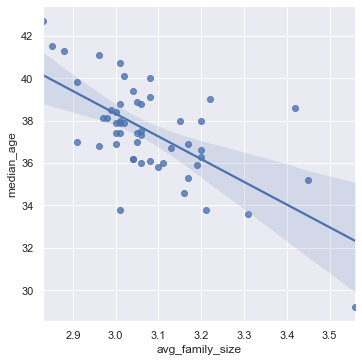

In [7]:
import seaborn as sns
sns.set()

# Construct the data frame
col_names = ['name', 'median_age', 'avg_family_size','state']
states = pd.DataFrame(columns = col_names, data = r.json()[1:])
# Convert each column with numeric data to an appropriate type
states["median_age"] = states["median_age"].astype(float)
states["avg_family_size"] = states["avg_family_size"].astype(float)


# Scatterplot with regression line
sns.lmplot(x = "avg_family_size", y = "median_age", data = states)

In [32]:
HOST = "https://api.census.gov/data"
year = '1980'
dataset = 'asc/B01003'
base_url = "/".join([HOST, year, dataset])
# Build dictionary of predicates
get_vars = ["NAME", "P001001"] # <- total population
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "place:*"
predicates["in"] = "state:17"

# Execute the request
r = requests.get(base_url, params=predicates)

# Show the response text
print(r.text)

<html><head><title>Error report</title></head><body><h1>HTTP Status 404 - /data/1980/asc/B01003</h1></body></html>


In [17]:
# Build base URL
HOST = "https://api.census.gov/data"
year = '2010'
dataset = 'dec/sf1'
base_url = "/".join([HOST, year, dataset])

# Specify Census variables and other predicates
get_vars = ['*']
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"

# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
print(r.text)

In [19]:
len(r.text)

0

In [33]:
import pathlib
import urllib.request

import geopandas as gpd

In [34]:
states_filename = "tl_2017_us_state.zip"
states_url = f"https://www2.census.gov/geo/tiger/TIGER2017/STATE/{states_filename}"
states_file = pathlib.Path(states_filename)

zipcode_filename = "tl_2017_us_zcta510.zip"
zipcode_url = f"https://www2.census.gov/geo/tiger/TIGER2017/ZCTA5/{zipcode_filename}"
zipcode_file = pathlib.Path(zipcode_filename)

for data_file, url in zip([states_file, zipcode_file], [states_url, zipcode_url]):
    if not data_file.is_file():
        with urllib.request.urlopen(url) as resp, \
                open(data_file, "wb") as f:

            f.write(resp.read())